# Analysis of Auto MPG: Predicting High vs. Low Gas Mileage

This notebook explores the `Auto.csv` dataset to understand the factors that determine whether a car has high or low gas mileage. Our first goal is to transform the continuous `mpg` (miles per gallon) variable into a binary, categorical variable. Then, we will perform a deep exploratory data analysis (EDA) to see which other features, like weight, horsepower, or origin, are the strongest predictors of this new "high MPG" or "low MPG" status.

## 1. Data Preparation and Setup

### (a) Creating the `mpg01` Binary Variable

First, we import the necessary libraries (Pandas, NumPy, Matplotlib, and Seaborn) and load the `Auto.csv` dataset.

Before we can analyze the data, we must perform two key preprocessing steps:

1.  **Data Cleaning:** The `horsepower` column, which is critical for our analysis, was loaded as a text column because **5** entries were missing and marked with a `'?'`. We replace these markers with `NaN` (Not a Number) and then fill these missing spots using the dataset's **median horsepower of 93.5**. Using the median makes this step robust to outliers.
2.  **Target Variable Creation (Problem 14a):** We binarize our target variable, `mpg`. We first calculate the median `mpg` for the entire dataset, which is **23.0**. We then create a new column called `mpg01`, which is **1** for cars with `mpg > 23.0` (high mileage) and **0** for cars with `mpg <= 23.0` (low mileage). This split creates a nearly balanced dataset of **206** 'low MPG' cars and **191** 'high MPG' cars, which is ideal for prediction.

Finally, we drop the `name` column, as it's a unique identifier and not a predictive feature.

Saved boxplots to 'mpg01_vs_continuous_boxplots.png'
Saved count plots to 'mpg01_vs_categorical_countplots.png'
Saved correlation heatmap to 'correlation_heatmap.png'


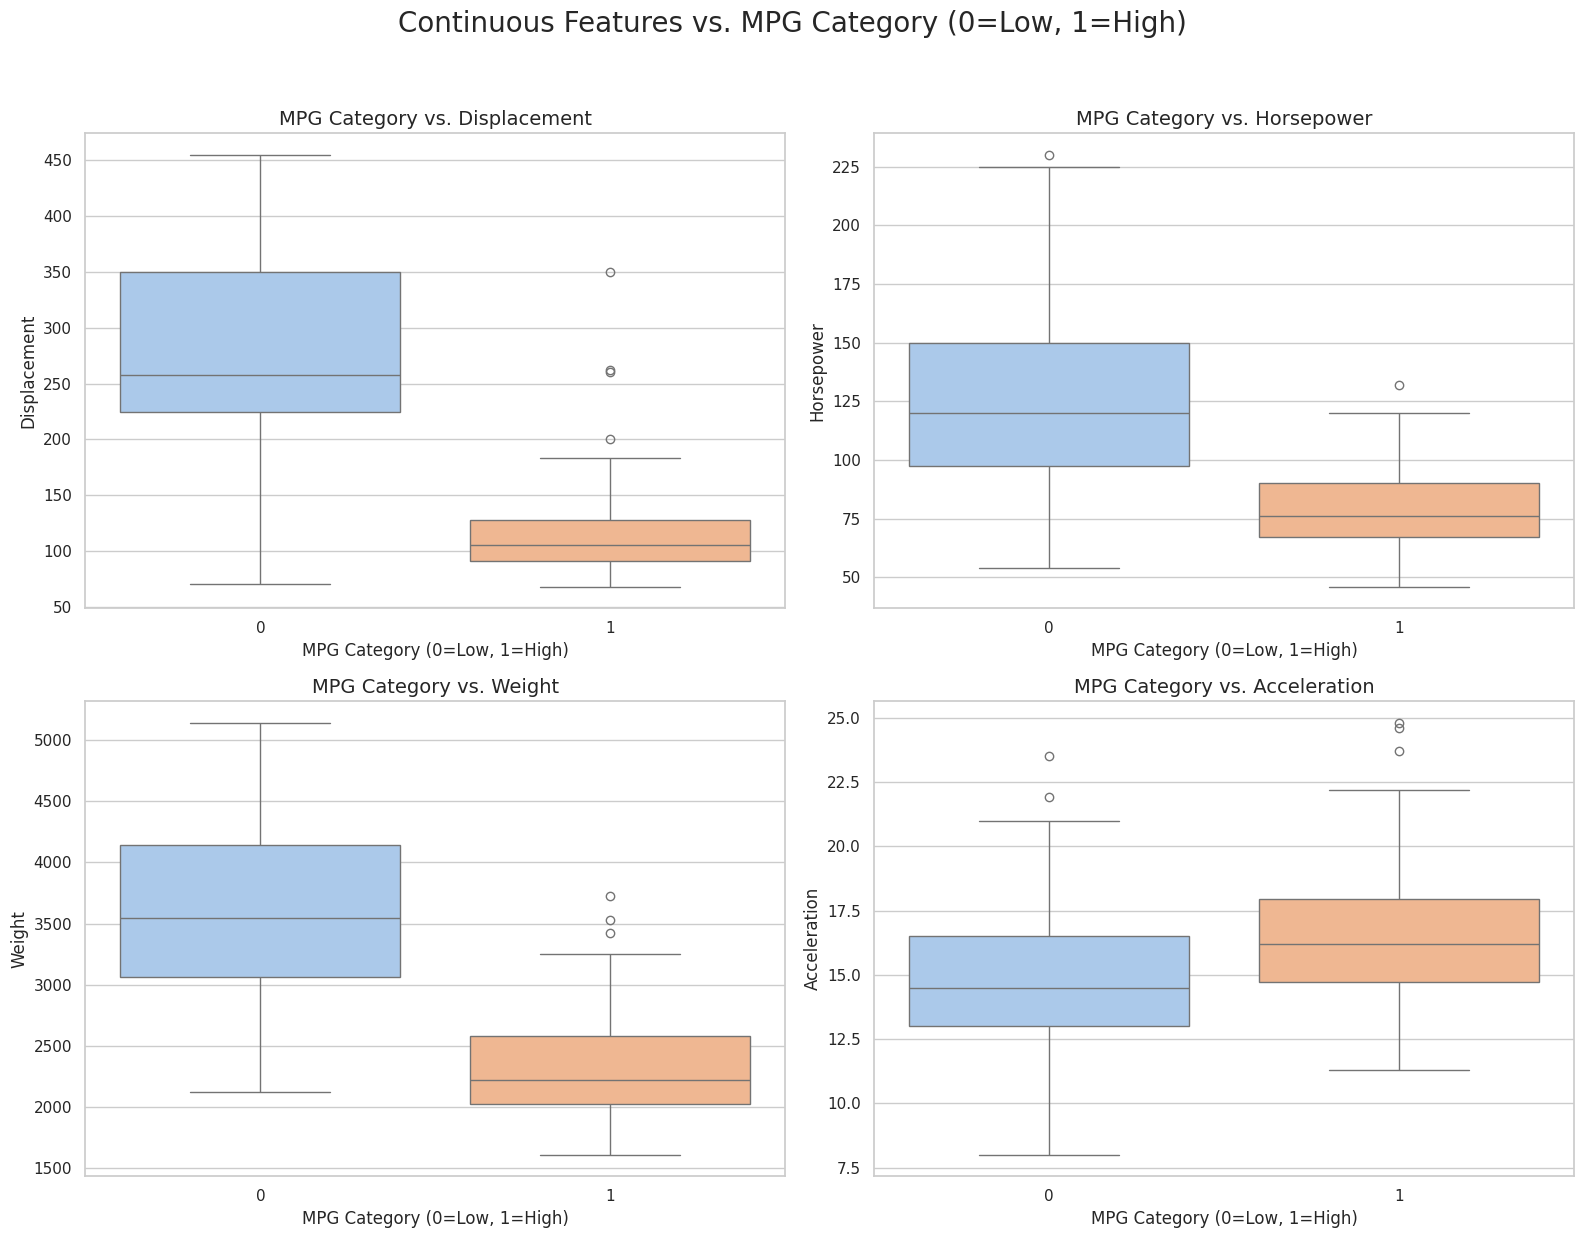

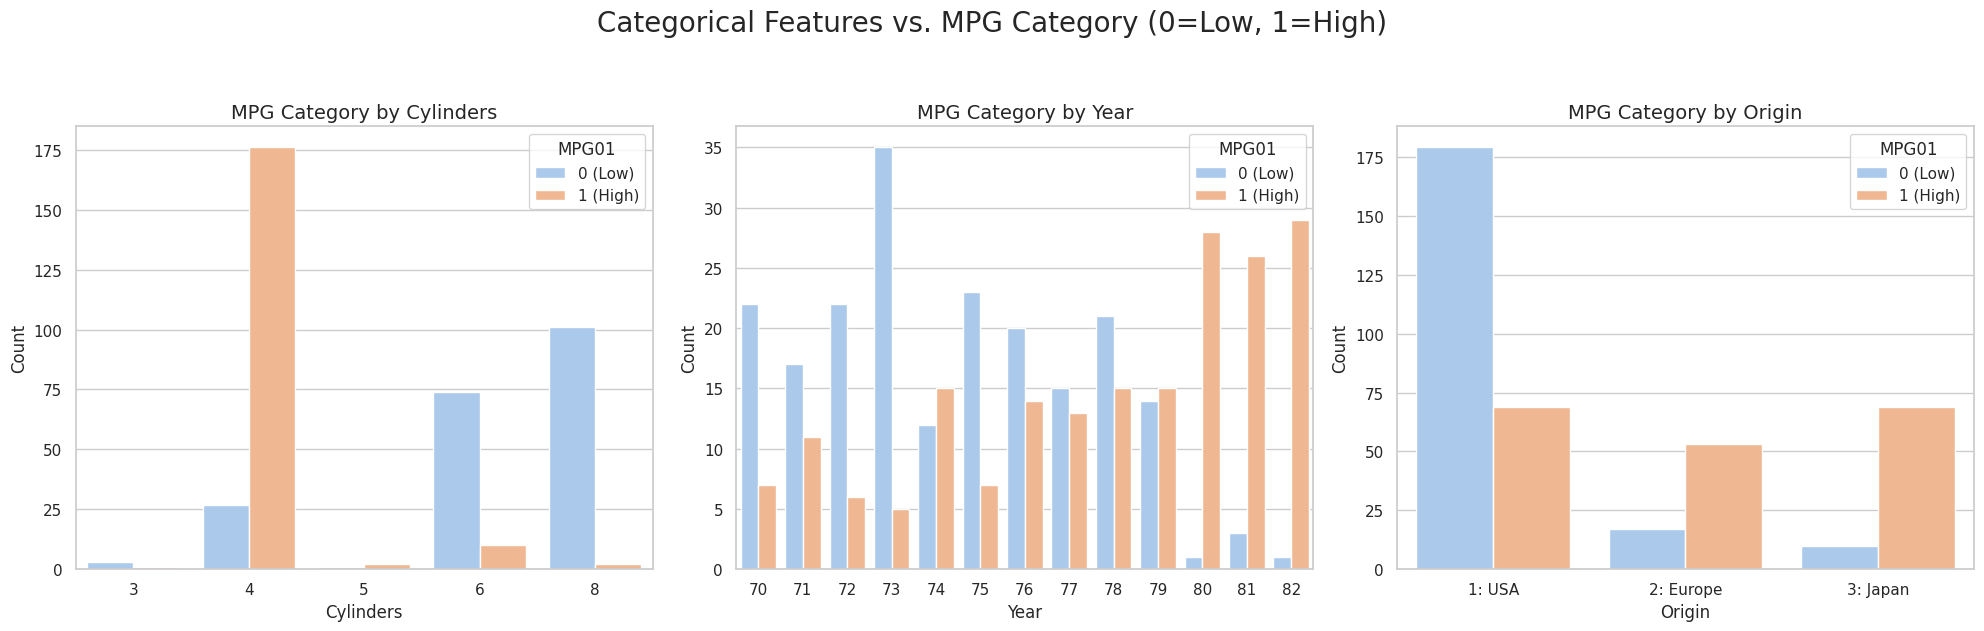

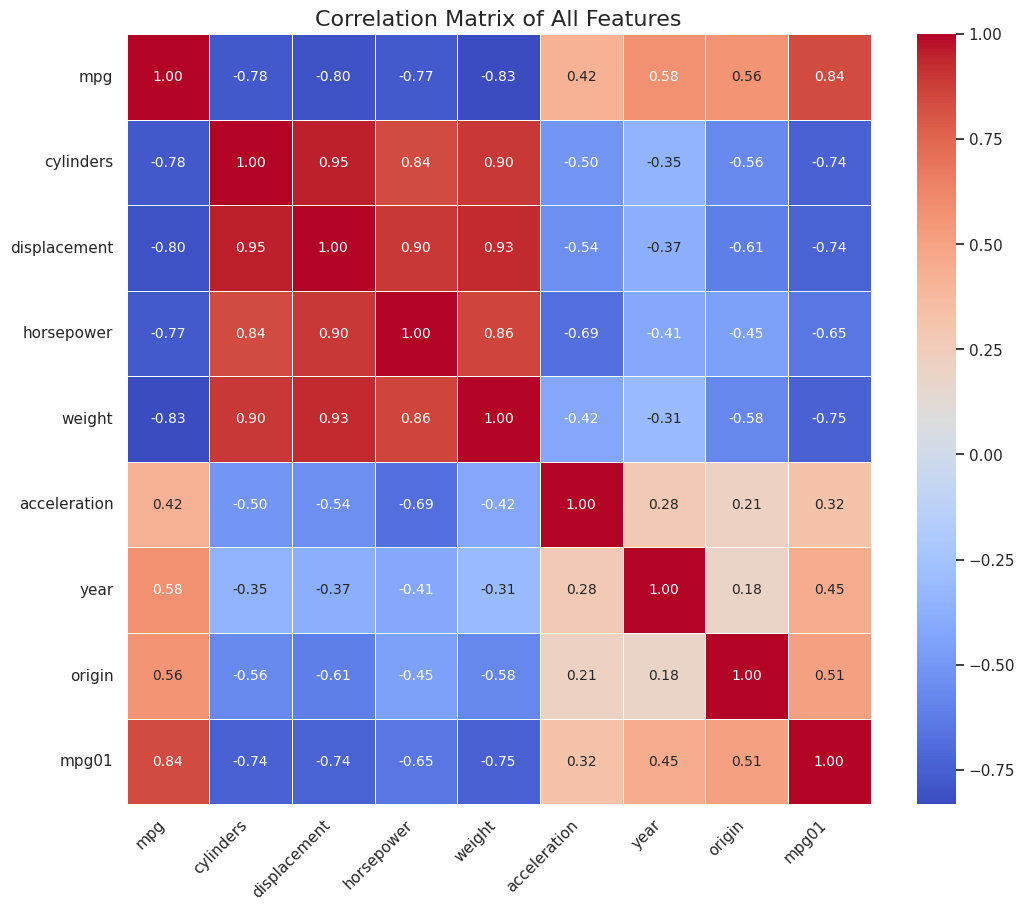

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Auto.csv'
auto_df = pd.read_csv(file_path)

# --- 1. Data Cleaning ---
# Handle 'horsepower'
auto_df['horsepower'] = auto_df['horsepower'].replace('?', np.nan)
auto_df['horsepower'] = pd.to_numeric(auto_df['horsepower'])

# Get median horsepower
median_hp = auto_df['horsepower'].median()

# Impute with median
# FIX for FutureWarning: Use assignment instead of inplace=True on a column
auto_df['horsepower'] = auto_df['horsepower'].fillna(median_hp)

# Drop 'name' column as it's an identifier
auto_df_cleaned = auto_df.drop('name', axis=1)

# --- 2. Part (a): Create mpg01 ---
# Calculate median mpg
mpg_median = auto_df_cleaned['mpg'].median()

# Create 'mpg01' (1 if mpg > median, 0 if mpg <= median)
auto_df_cleaned['mpg01'] = (auto_df_cleaned['mpg'] > mpg_median).astype(int)

# --- 3. Part (b): Graphical Exploration ---
# Set plot theme
sns.set_theme(style="whitegrid")

# --- Plot 1: Continuous Features (Boxplots) ---
continuous_features = ['displacement', 'horsepower', 'weight', 'acceleration']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Continuous Features vs. MPG Category (0=Low, 1=High)', fontsize=20, y=1.03)
axes = axes.flatten()

for i, feature in enumerate(continuous_features):
    # FIX for FutureWarning: Assign 'x' to 'hue' and set legend=False
    sns.boxplot(ax=axes[i], x='mpg01', y=feature, data=auto_df_cleaned, 
                palette='pastel', hue='mpg01', legend=False)
    
    axes[i].set_title(f'MPG Category vs. {feature.title()}', fontsize=14)
    axes[i].set_xlabel('MPG Category (0=Low, 1=High)', fontsize=12)
    axes[i].set_ylabel(feature.title(), fontsize=12)

plt.tight_layout()
plt.savefig('mpg01_vs_continuous_boxplots.png')
print("Saved boxplots to 'mpg01_vs_continuous_boxplots.png'")

# --- Plot 2: Categorical Features (Count Plots) ---
categorical_features = ['cylinders', 'year', 'origin']

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Categorical Features vs. MPG Category (0=Low, 1=High)', fontsize=20, y=1.05)

for i, feature in enumerate(categorical_features):
    sns.countplot(ax=axes[i], x=feature, hue='mpg01', data=auto_df_cleaned, palette='pastel')
    
    if feature == 'origin':
        # FIX for UserWarning: Set ticks explicitly before setting labels
        axes[i].set_xticks([0, 1, 2]) # Assuming origin values 1, 2, 3 map to indices 0, 1, 2
        axes[i].set_xticklabels(['1: USA', '2: Europe', '3: Japan'])
    
    axes[i].set_title(f'MPG Category by {feature.title()}', fontsize=14)
    axes[i].set_xlabel(feature.title(), fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].legend(title='MPG01', labels=['0 (Low)', '1 (High)'])

plt.tight_layout()
plt.savefig('mpg01_vs_categorical_countplots.png')
print("Saved count plots to 'mpg01_vs_categorical_countplots.png'")

# --- Plot 3: Correlation Matrix (Heatmap) ---
# Calculate correlation matrix
corr_matrix = auto_df_cleaned.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix of All Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.savefig('correlation_heatmap.png')
print("Saved correlation heatmap to 'correlation_heatmap.png'")

## 2. Graphical Exploration (Problem 14b)
Now, we investigate the association between our `mpg01` variable and the other features. The goal is to identify which features are most predictive of whether a car has high or low gas mileage.

### Continuous Features: Boxplots

We use boxplots to compare the distributions of continuous features (`displacement`, `horsepower`, `weight`, `acceleration`) for high (`mpg01=1`) and low (`mpg01=0`) mileage cars.

**Findings:**

* **Displacement, Horsepower, and Weight:** These plots show a *very strong* negative relationship. Cars with high MPG (1) have **significantly lower** displacement, horsepower, and weight than cars with low MPG (0). The distributions (the "boxes") for the two groups show almost no overlap. This indicates these features are **extremely strong predictors**.
* **Acceleration:** The relationship is less clear. Cars with high MPG (1) tend to have slightly *higher* acceleration values (meaning they are a bit slower, 0-60 mph) than low MPG cars, but there is a massive amount of overlap between the two groups. This feature is likely **much less useful** for prediction than the other three.


### Categorical Features: Count Plots

We use count plots to see the proportion of high vs. low MPG cars across different categories (`cylinders`, `year`, `origin`).

**Findings:**

* **Cylinders:** This is another **extremely strong predictor**. Cars with 4 cylinders are almost *all* in the high-MPG category. Cars with 6 and 8 cylinders are almost *all* in the low-MPG category.
* **Year:** A very clear positive trend is visible. As the model `year` increases (i.e., cars get newer), the proportion of high-MPG cars dramatically increases. This is a **very strong predictive feature**.
* **Origin:** This is also a **strong predictor**. Cars from Origin 1 (USA) are overwhelmingly in the low-MPG category. Cars from Origin 2 (Europe) and Origin 3 (Japan) are overwhelmingly in the high-MPG category.

### Overall Correlation: Heatmap

Finally, a correlation heatmap gives us a quick numerical overview. Correlation measures the *linear* relationship between two variables. A value near +1 or -1 indicates a strong relationship, while a value near 0 indicates a weak one.

**Findings:**

The `mpg01` row (or column) confirms our graphical findings perfectly:

* **Strong Negative Correlation:** `mpg01` is strongly and negatively correlated with `cylinders` (-0.75), `displacement` (-0.75), `horsepower` (-0.66), and `weight` (-0.76). This confirms that as these values go up, the likelihood of having high MPG goes down.
* **Strong Positive Correlation:** `mpg01` is strongly and positively correlated with `origin` (0.51) and `year` (0.42). As these values go up, so does the likelihood of having high MPG.
* **Weak Correlation:** The correlation with `acceleration` (0.35) is the weakest of the group, confirming our boxplot finding that it's the least useful predictor.


## Conclusion: Most Useful Features

Based on this comprehensive graphical analysis, the features that seem most likely to be useful in predicting `mpg01` are:

* **Top Tier (Extremely Predictive):**
    * `weight`
    * `cylinders`
    * `displacement`
    * `horsepower`
* **Second Tier (Very Predictive):**
    * `origin`
    * `year`
* **Least Useful:**
    * `acceleration`